In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from time import time
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
pd.options.display.max_columns = None
pd.options.display.max_rows = None
matplotlib.rcParams.update({'font.size': 22})

In [13]:
results_path = "./deepar_stability_study/"

In [14]:
results = pd.read_csv(results_path + "results.csv", sep=";")

In [15]:
results.head()

,max_epochs,MAPE,trial_nb
0,100,9.654459,1
1,100,7.244232,2
2,100,11.897097,3
3,100,23.639510,4
4,100,9.821197,5


In [16]:
import seaborn as sns

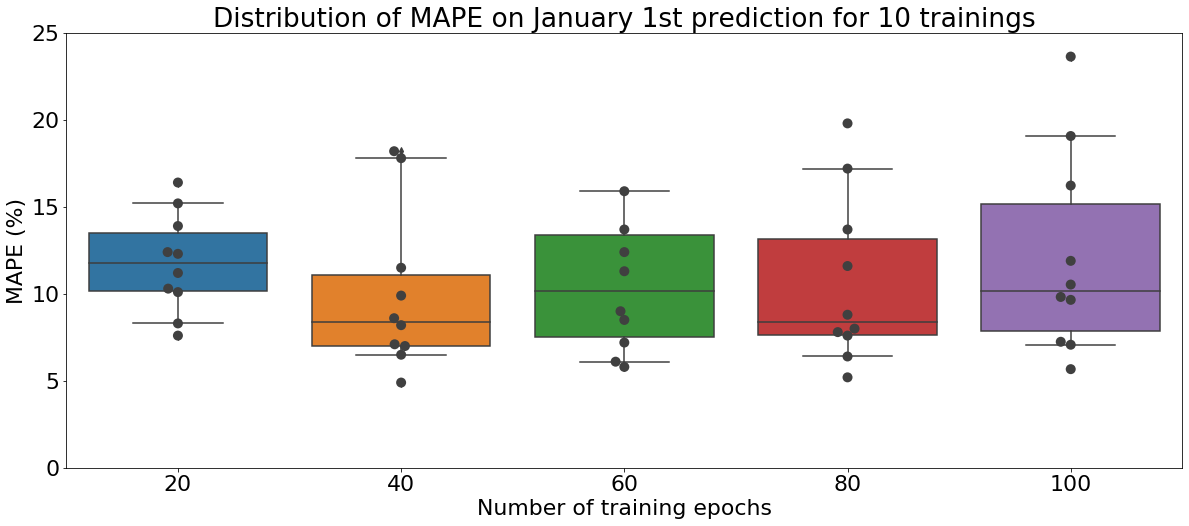

In [50]:
matplotlib.rcParams.update({'font.size': 22})
plt.figure(1, figsize=(20, 8))
ax = sns.boxplot(x="max_epochs", y="MAPE", data=results, whis=[10, 90])
ax = sns.swarmplot(x="max_epochs", y="MAPE", data=results, color=".25", s=10)
plt.xlabel("Number of training epochs")
plt.ylabel("MAPE (%)")
plt.ylim([0, 25])
plt.title("Distribution of MAPE on January 1st prediction for 10 trainings")
plt.savefig(results_path + "max_epochs_stability_boxplot.png")

In [44]:
results_pred = pd.read_csv("./deepar_stability_study/sample_prediction_results.csv", sep=";")

In [45]:
results_pred.head()

,num_eval_sample,MAPE,trial
0,10,0.062735,1
1,10,0.060558,2
2,10,0.062477,3
3,10,0.061097,4
4,10,0.063679,5


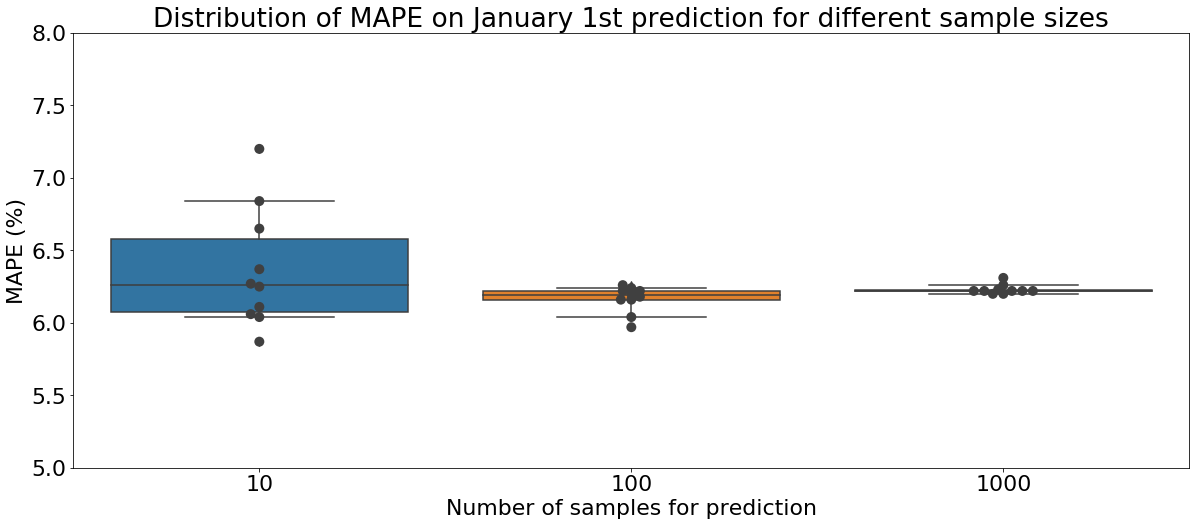

In [52]:
results_pred["MAPE_r"] = results_pred["MAPE"].apply(lambda x: round(100*x, 2))
matplotlib.rcParams.update({'font.size': 22})
plt.figure(1, figsize=(20, 8))
ax = sns.boxplot(x="num_eval_sample", y="MAPE_r", data=results_pred, whis=[10, 90])
ax = sns.swarmplot(x="num_eval_sample", y="MAPE_r", data=results_pred, color=".25", s=10)
plt.xlabel("Number of samples for prediction")
plt.ylabel("MAPE (%)")
plt.ylim([5, 8])
plt.title("Distribution of MAPE on January 1st prediction for different sample sizes")
plt.savefig(results_path + "stability sample size.png")